In [10]:
import os

In [15]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%autoreload 2


In [17]:
from model import lstm_model

In [18]:
from transform import syllable

In [19]:
from utils import utils

In [20]:
from model.train import train_model

In [21]:
import numpy as np

In [22]:
import itertools

In [23]:
from utils import dictionary

In [24]:
dataset = utils.read_dataset('/Users/alexander/Diploma/txt_acc_nkrja/')

In [25]:
from utils import dictionary

In [26]:
syl_dict = dictionary.EncodingDictionary.read_dictionary('model/train/Syllables.dict')

In [27]:
from transform import encoding

In [30]:
x,y = encoding.dataset_to_xy(dataset, 4, syl_dict)

100%|██████████| 1276294/1276294 [03:19<00:00, 6401.38it/s] 


In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [35]:
import tensorflow as tf
tf.reset_default_graph()
s = tf.InteractiveSession()

In [36]:
max_len = 30

In [37]:
model = lstm_model.BidirectionalLSTMModel('model', syl_dict, 128, 32, max_len)

In [38]:
predictor = train_model.creacte_predictor(model,  s)

In [40]:
optimizer = tf.train.AdamOptimizer()

In [41]:
training = train_model.create_training(model, optimizer, max_len, s)

In [42]:
from model.train import prepare_batch

In [45]:
def initialize_uninitialized(sess = None):
    """
    Initialize unitialized variables, doesn't affect those already initialized
    :param sess: in which session to initialize stuff. Defaults to tf.get_default_session()
    """
    sess = tf.get_default_session()
    global_vars          = tf.global_variables()
    is_not_initialized   = sess.run([tf.is_variable_initialized(var) for var in global_vars])
    not_initialized_vars = [v for (v, f) in zip(global_vars, is_not_initialized) if not f]
    if len(not_initialized_vars):
        sess.run(tf.variables_initializer(not_initialized_vars))

In [46]:
initialize_uninitialized()

In [47]:
from tqdm import tqdm

In [48]:
inp = tf.placeholder('int32', [None])
oh_test = s.run(tf.one_hot(inp, max_len), {inp:y_test})

In [49]:
X_test_matrix = prepare_batch.conv_to_matrix(X_test, syl_dict.get_end_char())

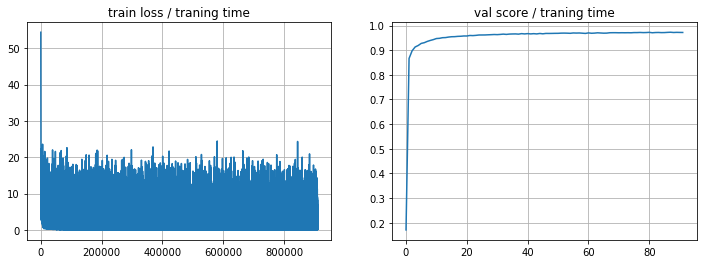

  9%|▉         | 910004/10000000 [7:41:19<9860:49:23,  3.91s/it] 

llh=1.564, mean score=0.972


  9%|▉         | 912386/10000000 [7:42:27<65:40:21, 38.44it/s]  

KeyboardInterrupt: 

  9%|▉         | 912386/10000000 [7:42:38<76:48:03, 32.87it/s]

In [67]:
from IPython.display import clear_output
losses = []
scores = []
for i in tqdm(range(10000000)):
    bx,by = prepare_batch.prepare_batch(X_train, y_train, syl_dict.get_end_char(), 16)
    loss, _ = training((bx, by))
    losses.append(loss)
    if i > 0 andi % 10000 == 0:
        val_scores = []
        for j in range((len(X_test_matrix)  + 1023) // 1024):
            val_scores.append(train_model.get_score(
                (X_test_matrix[1024 * j: 1024 * (j+1)], oh_test[1024 * j: 1024 * (j+1)]), predictor))
        scores.append(np.mean(val_scores))
        clear_output(True)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.title('train loss / traning time')
        plt.plot(losses)
        plt.grid()
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(scores)
        plt.grid()
        plt.show()
        print("llh=%.3f, mean score=%.3f"%(np.mean(losses[-10:]),np.mean(scores[-10:])))

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

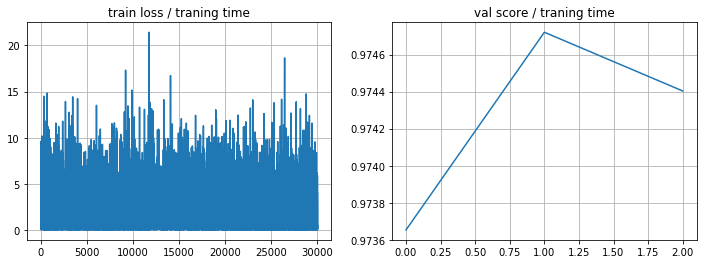

  0%|          | 30005/10000000 [17:55<37886:38:49, 13.68s/it]

llh=1.252, mean score=0.974


  0%|          | 30265/10000000 [18:02<90:05:48, 30.74it/s]   

KeyboardInterrupt: 

  0%|          | 30265/10000000 [18:19<100:38:46, 27.52it/s]

In [57]:
from IPython.display import clear_output
losses = []
scores = []
for i in tqdm(range(10000000)):
    bx,by = prepare_batch.prepare_batch(X_train, y_train, syl_dict.get_end_char(), 16)
    loss, _ = training((bx, by))
    losses.append(loss)
    if i > 0 and i % 10000 == 0:
        val_scores = []
        for j in range((len(X_test_matrix)  + 1023) // 1024):
            val_scores.append(train_model.get_score(
                (X_test_matrix[1024 * j: 1024 * (j+1)], oh_test[1024 * j: 1024 * (j+1)]), predictor))
        scores.append(np.mean(val_scores))
        clear_output(True)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.title('train loss / traning time')
        plt.plot(losses)
        plt.grid()
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(scores)
        plt.grid()
        plt.show()
        print("llh=%.3f, mean score=%.3f"%(np.mean(losses[-10:]),np.mean(scores[-10:])))

In [60]:
optimizer = tf.train.AdamOptimizer(name='Adam_low', learning_rate=1e-4)

In [61]:
training = train_model.create_training(model, optimizer, max_len, s)

In [63]:
initialize_uninitialized()

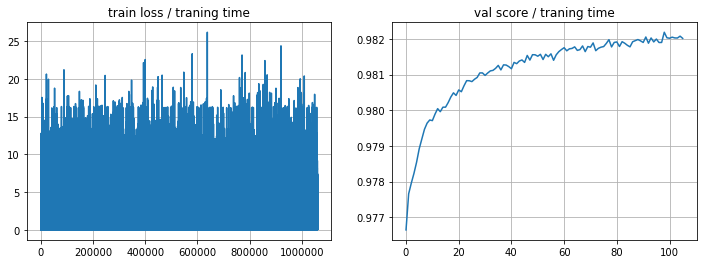

 11%|█         | 1060004/10000000 [9:11:24<32598:30:57, 13.13s/it]

llh=0.355, mean score=0.982


 11%|█         | 1068569/10000000 [9:15:08<70:20:44, 35.27it/s]   

KeyboardInterrupt: 

 11%|█         | 1068569/10000000 [9:15:26<77:22:29, 32.06it/s]

In [64]:
from IPython.display import clear_output
losses = []
scores = []
for i in tqdm(range(10000000)):
    bx,by = prepare_batch.prepare_batch(X_train, y_train, syl_dict.get_end_char(), 16)
    loss, _ = training((bx, by))
    losses.append(loss)
    if i > 0 and i % 10000 == 0:
        val_scores = []
        for j in range((len(X_test_matrix)  + 1023) // 1024):
            val_scores.append(train_model.get_score(
                (X_test_matrix[1024 * j: 1024 * (j+1)], oh_test[1024 * j: 1024 * (j+1)]), predictor))
        scores.append(np.mean(val_scores))
        clear_output(True)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.title('train loss / traning time')
        plt.plot(losses)
        plt.grid()
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(scores)
        plt.grid()
        plt.show()
        print("llh=%.3f, mean score=%.3f"%(np.mean(losses[-10:]),np.mean(scores[-10:])))

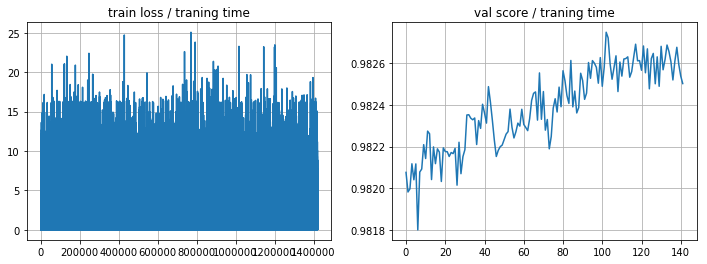

 14%|█▍        | 1420005/10000000 [12:17:14<10505:23:31,  4.41s/it]

llh=1.139, mean score=0.983


 14%|█▍        | 1426590/10000000 [12:20:00<64:19:36, 37.02it/s]   

KeyboardInterrupt: 

 14%|█▍        | 1426590/10000000 [12:20:18<74:09:04, 32.12it/s]

In [65]:
from IPython.display import clear_output
losses = []
scores = []
for i in tqdm(range(10000000)):
    bx,by = prepare_batch.prepare_batch(X_train, y_train, syl_dict.get_end_char(), 16)
    loss, _ = training((bx, by))
    losses.append(loss)
    if i > 0 and i % 10000 == 0:
        val_scores = []
        for j in range((len(X_test_matrix)  + 1023) // 1024):
            val_scores.append(train_model.get_score(
                (X_test_matrix[1024 * j: 1024 * (j+1)], oh_test[1024 * j: 1024 * (j+1)]), predictor))
        scores.append(np.mean(val_scores))
        clear_output(True)
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.title('train loss / traning time')
        plt.plot(losses)
        plt.grid()
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(scores)
        plt.grid()
        plt.show()
        print("llh=%.3f, mean score=%.3f"%(np.mean(losses[-10:]),np.mean(scores[-10:])))

In [67]:
saver.save(s, "trained/long_trained.ckpt")

'trained/long_trained.ckpt'